# Projeto DSA - Análise de risco de crédito

# Descrição do projeto
Os cartões de pontuação de crédito são um método comum de controle de risco no setor financeiro. Ele usa informações e dados pessoais enviados por solicitantes de cartão de crédito para prever a probabilidade de inadimplências futuras e empréstimos de cartão de crédito. O banco pode decidir se deve emitir um cartão de crédito para o solicitante. As pontuações de crédito podem quantificar objetivamente a magnitude do risco.
 
De um modo geral, os cartões de pontuação de crédito são baseados em dados históricos. Uma vez encontrando grandes flutuações econômicas. Modelos anteriores podem perder seu poder preditivo original. O modelo logístico é um método comum para pontuação de crédito. Porque Logistic é adequado para tarefas de classificação binária e pode calcular os coeficientes de cada recurso. Para facilitar o entendimento e a operação, o cartão de pontuação multiplicará o coeficiente de regressão logística por um determinado valor (como 100) e o arredondará.
 
Atualmente, com o desenvolvimento de algoritmos de aprendizado de máquina. Métodos mais preditivos, como Boosting, Random Forest e Support Vector Machines, foram introduzidos na pontuação de cartão de crédito. No entanto, esses métodos geralmente não têm boa transparência. Pode ser difícil fornecer aos clientes e reguladores um motivo para rejeição ou aceitação.

# Análise de negocio
Construir um modelo de aprendizado de máquina para prever se um candidato é um cliente 'bom' ou 'ruim', diferente de outras tarefas, a definição de 'bom' ou 'ruim' não é fornecida. Você deve usar alguma técnica, como análise vintage para construir seu rótulo. Além disso, o problema de dados desbalanceados é um grande problema nesta tarefa.

# Dicionário dados
person_age: Idade

person_income: Rendimento anual

person_home_ownership: Pessoa casa própria

person_emp_length: Comprimento do emp da pessoa	Tempo de trabalho (em anos)

loan_intent: Empréstimo intenção

loan_grade: Grau do empréstimo

loan_amnt: valor empréstimo

loan_int_rate: Taxa de juro

loan_status: Status do empréstimo (0 não é padrão 1 é padrão)

loanpercentincome: Renda percentual

cbpersondefaultonfile: Padrão histórico

cbpresoncredhistlength: Comprimento do histórico de crédito 

In [1]:
# Instalando pacotes
!pip install watermark

In [2]:
# Versão do python
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.9.7


In [3]:
#Importação das bibliotecas
import pandas as pd # Carregamento de arquivos de csv
import numpy as np # Carregamento cálculos em arrays multidimensionais

# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Verficações da versões das bibliotecas

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

numpy     : 1.20.3
watermark : 2.3.1
matplotlib: 3.4.3
pandas    : 1.3.4
seaborn   : 0.11.2
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]



In [5]:
# Configuração fundo dos gráficos e estilo, tamanho da fonte

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
color = sns.color_palette()

# Dataset

In [6]:
df = pd.read_csv("credit_dataset.csv", sep = ",")
df

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [7]:
# Exebindo o 5 primeiro dados 
df.head(5)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [8]:
# Exebindo o 5 últimos dados
df.tail(5)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1
999,0,1,30,2,2,6350,4,4,4,3,...,4,2,31,2,2,1,3,1,1,1


In [9]:
# Número de linhas e colunas 
df.shape

(1000, 21)

In [10]:
# Exibido os tipos de dados
df.dtypes

credit.rating                     int64
account.balance                   int64
credit.duration.months            int64
previous.credit.payment.status    int64
credit.purpose                    int64
credit.amount                     int64
savings                           int64
employment.duration               int64
installment.rate                  int64
marital.status                    int64
guarantor                         int64
residence.duration                int64
current.assets                    int64
age                               int64
other.credits                     int64
apartment.type                    int64
bank.credits                      int64
occupation                        int64
dependents                        int64
telephone                         int64
foreign.worker                    int64
dtype: object

In [11]:
# Informando as informações e das variaveis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [12]:
# Total de colunas e linhas 

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1000
Columns: 21


In [13]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 credit.rating                       2
account.balance                     3
credit.duration.months             33
previous.credit.payment.status      3
credit.purpose                      4
credit.amount                     923
savings                             4
employment.duration                 4
installment.rate                    4
marital.status                      3
guarantor                           2
residence.duration                  4
current.assets                      4
age                                53
other.credits                       2
apartment.type                      3
bank.credits                        2
occupation                          4
dependents                          2
telephone                           2
foreign.worker                      2
dtype: int64


In [14]:
# Total de número duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# Pré-processamento

In [15]:
# Variáveis númericas
data_numeric = df[["credit.duration.months", "age", "credit.amount"]]

# Variaveis categorical
data_cat = df[['credit.rating', 'account.balance', 'previous.credit.payment.status','credit.purpose', 'savings', 'employment.duration', 'installment.rate','marital.status', 'guarantor', 'residence.duration', 'current.assets',
'other.credits', 'apartment.type', 'bank.credits', 'occupation','dependents', 'telephone', 'foreign.worker']]

# Estatística descritiva

In [16]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


In [17]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
credit.rating,1.000000,0.339409,-0.214927,0.220233,-0.106696,-0.154740,0.179191,0.118092,-0.072404,0.091249,...,-0.002967,-0.142612,0.091272,0.113285,0.018119,0.045727,-0.032735,0.003015,0.036466,0.082079
account.balance,0.339409,1.000000,-0.071254,0.180614,-0.009361,-0.041161,0.228340,0.081681,-0.022551,0.034715,...,-0.064727,-0.030244,0.052530,0.049352,0.029771,0.074127,0.030366,-0.027676,0.063609,-0.036607
credit.duration.months,-0.214927,-0.071254,1.000000,-0.041958,-0.059048,0.624988,0.048550,0.061587,0.074749,0.045124,...,0.034067,0.303971,-0.037550,-0.077411,0.153126,0.011292,0.210910,-0.023834,0.164718,-0.134680
previous.credit.payment.status,0.220233,0.180614,-0.041958,1.000000,-0.017890,-0.027384,0.023986,0.138263,0.030111,0.071611,...,0.045684,-0.051508,0.129399,0.179456,0.057877,0.461048,0.029693,0.007751,0.059245,0.018756
credit.purpose,-0.106696,-0.009361,-0.059048,-0.017890,1.000000,-0.115828,-0.034783,-0.002226,0.057127,0.043448,...,-0.064780,-0.101466,0.054790,-0.059549,0.016472,0.070146,-0.150255,0.046717,-0.041661,0.067047
credit.amount,-0.154740,-0.041161,0.624988,-0.027384,-0.115828,1.000000,0.060829,0.009649,-0.271322,0.029854,...,0.028917,0.311602,0.032273,-0.081724,0.133024,0.027446,0.285393,0.017144,0.277000,-0.030662
savings,0.179191,0.228340,0.048550,0.023986,-0.034783,0.060829,1.000000,0.129549,0.016900,0.031260,...,0.095107,0.028765,0.080127,0.001212,0.004620,-0.025604,0.008837,0.026641,0.085042,0.007363
employment.duration,0.118092,0.081681,0.061587,0.138263,-0.002226,0.009649,0.129549,1.000000,0.127099,0.166372,...,0.275736,0.115811,0.307389,0.009201,0.143640,0.139536,0.118875,0.097196,0.084495,-0.031172
installment.rate,-0.072404,-0.022551,0.074749,0.030111,0.057127,-0.271322,0.016900,0.127099,1.000000,0.116588,...,0.049302,0.053391,0.057271,0.002248,0.091229,0.027664,0.097755,-0.071207,0.014413,-0.094762
marital.status,0.091249,0.034715,0.045124,0.071611,0.043448,0.029854,0.031260,0.166372,0.116588,1.000000,...,-0.024086,0.017707,0.073569,-0.035680,0.160620,0.076789,0.022549,0.169273,0.051038,0.080643


Text(0.5, 1.0, 'Matriz de correlação')

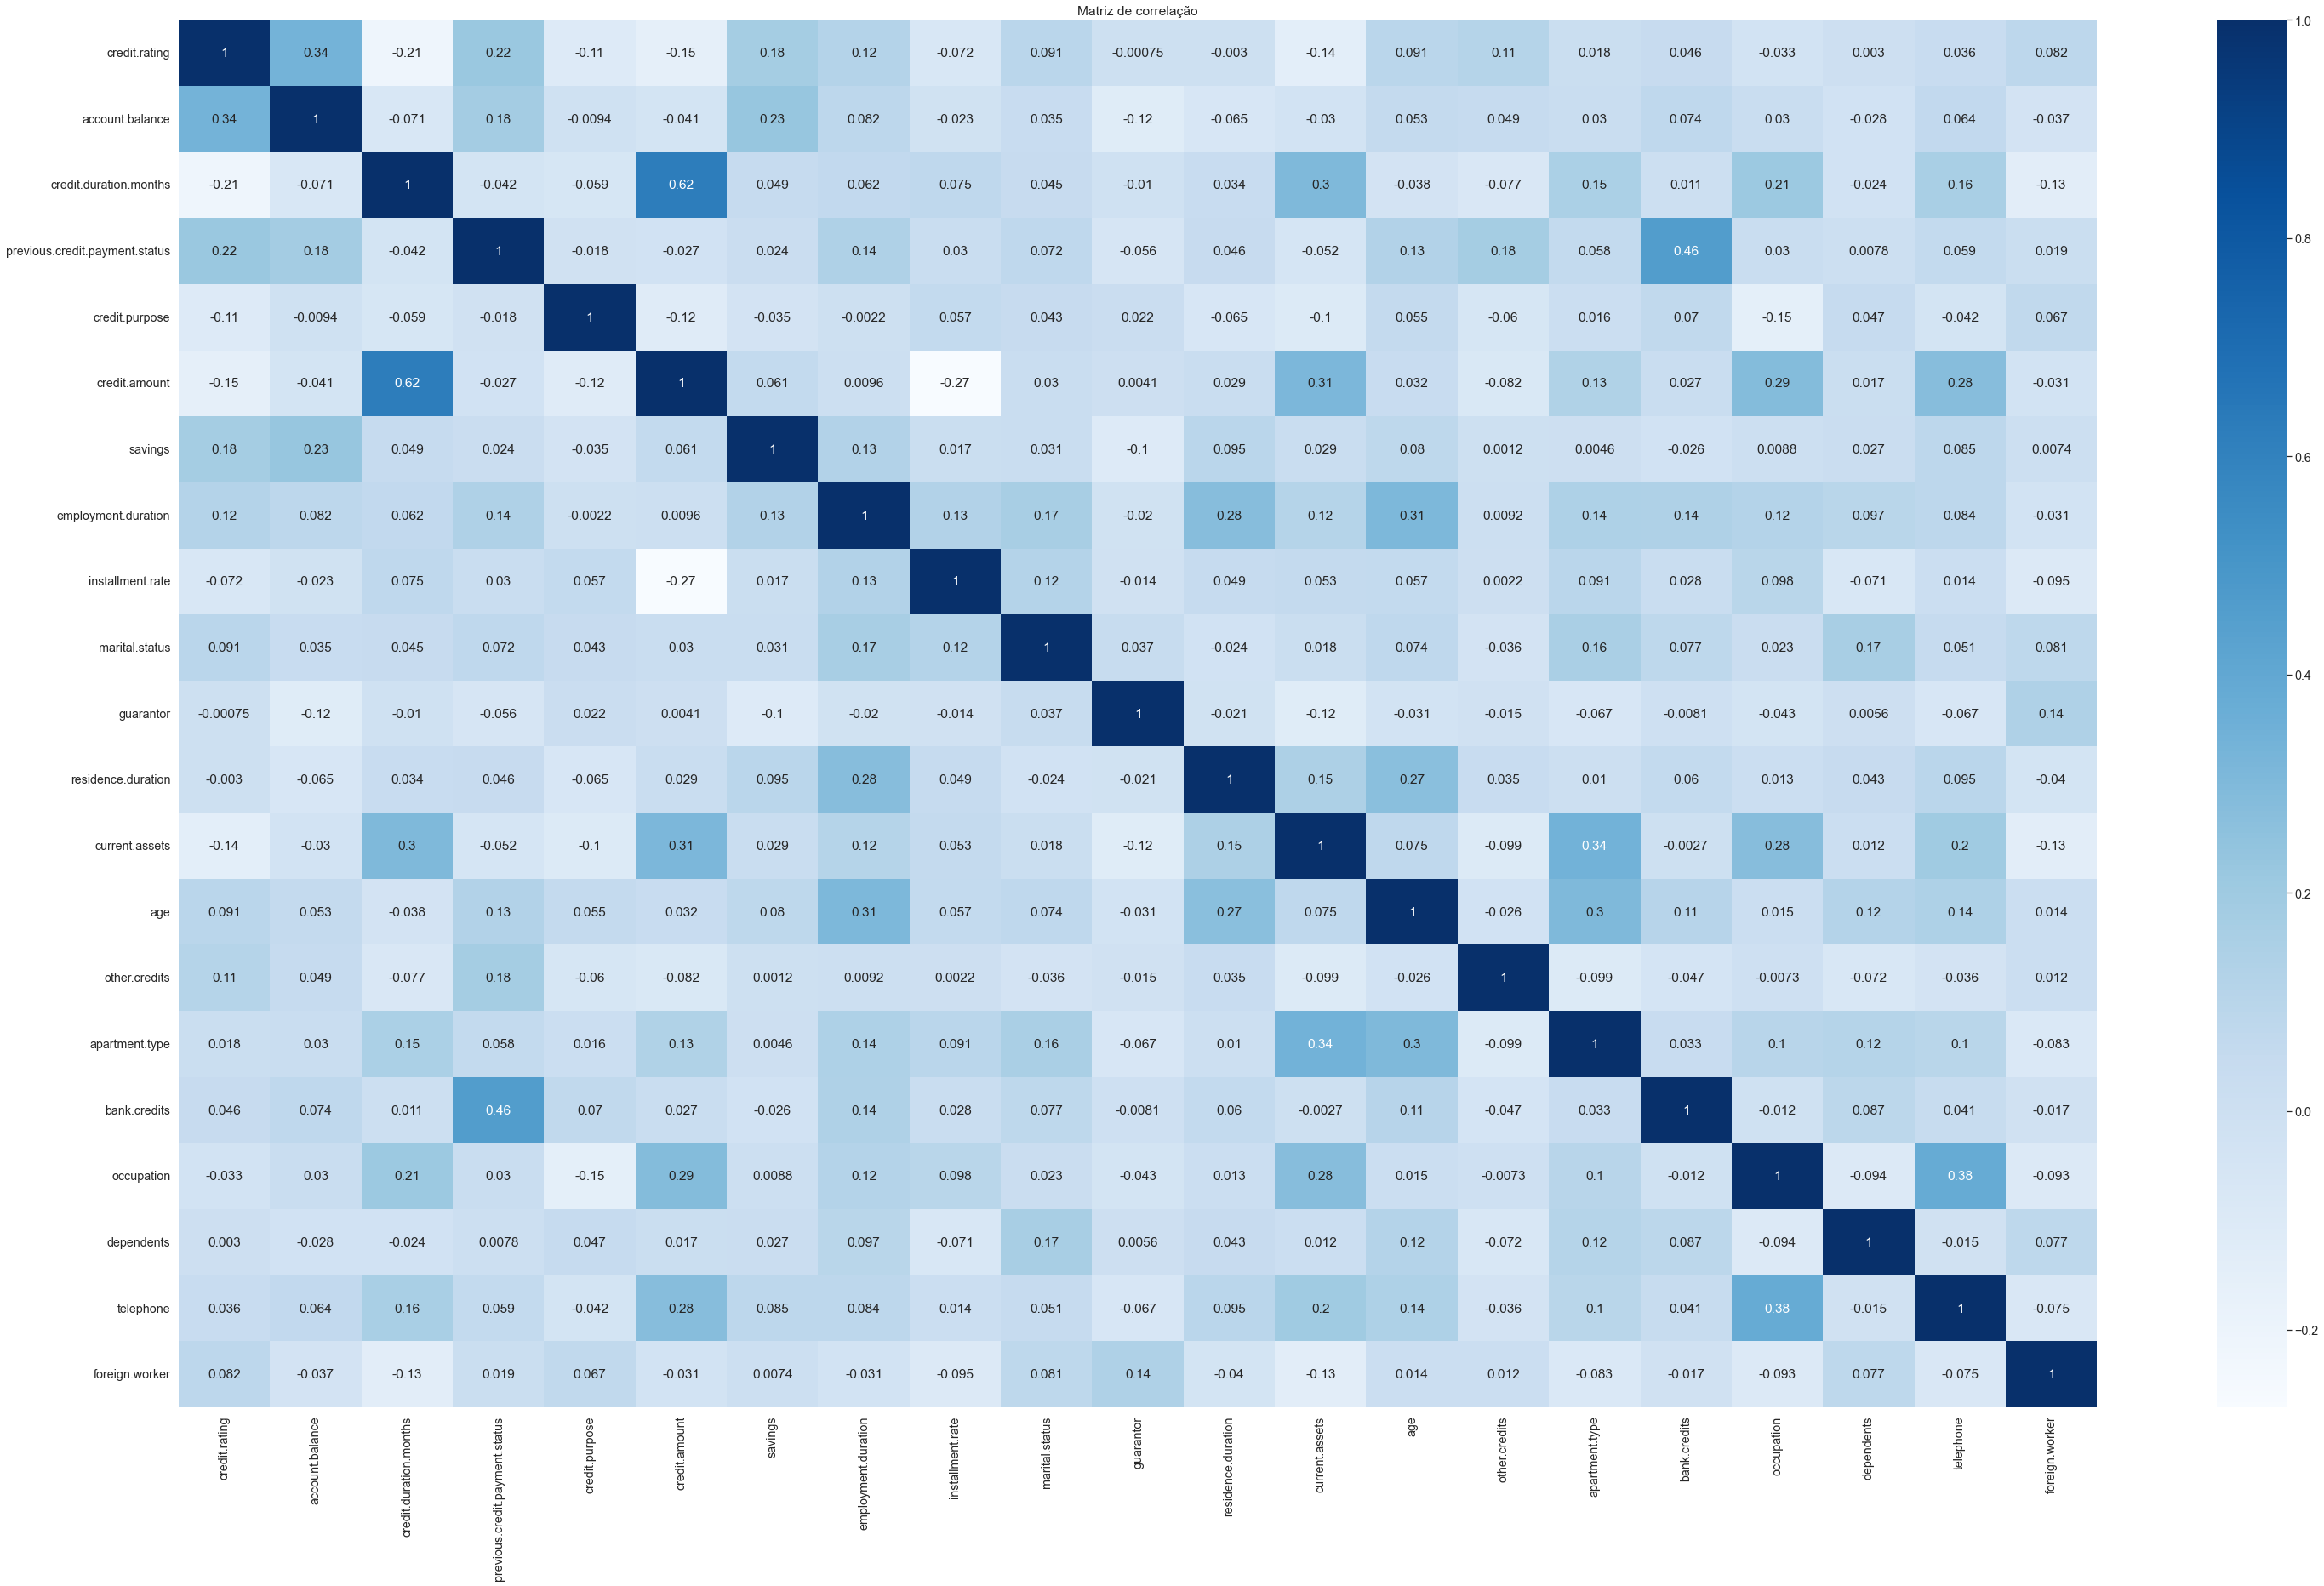

In [19]:
# Gráfico da matriz de correlação

plt.figure(figsize=(50.5,30))
ax = sns.heatmap(corr, annot=True, cmap='Blues');
plt.title("Matriz de correlação")

# Análise de dados

Text(0, 0.5, 'Total')

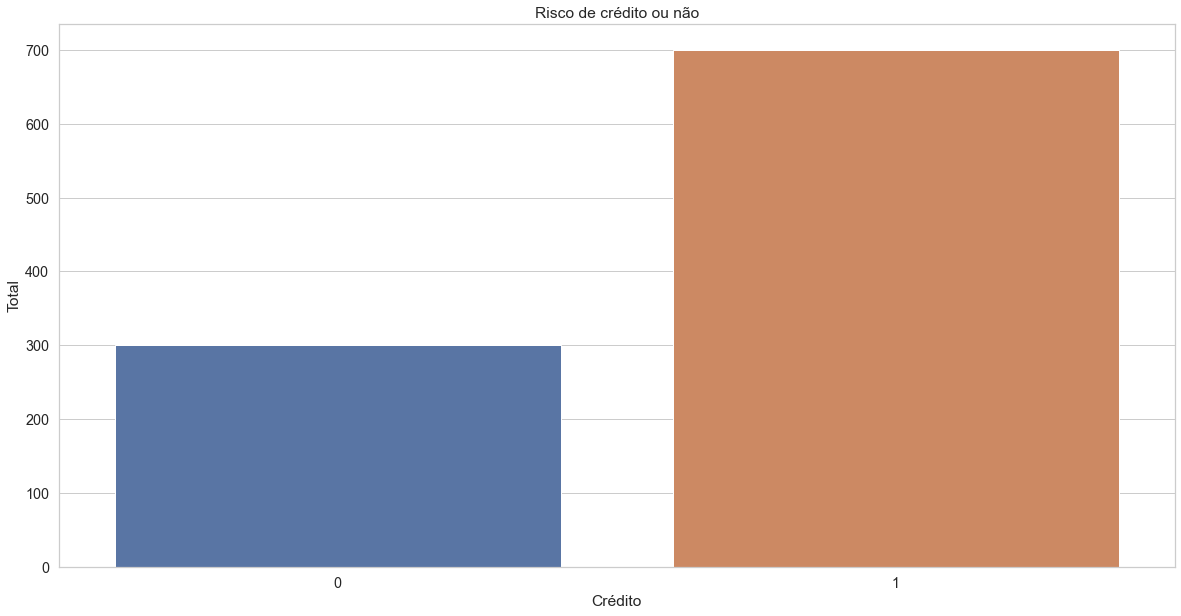

In [168]:
plt.figure(figsize=(20,10))
plt.title("Risco de crédito ou não")
sns.countplot(df["credit.rating"])
plt.xlabel("Crédito")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

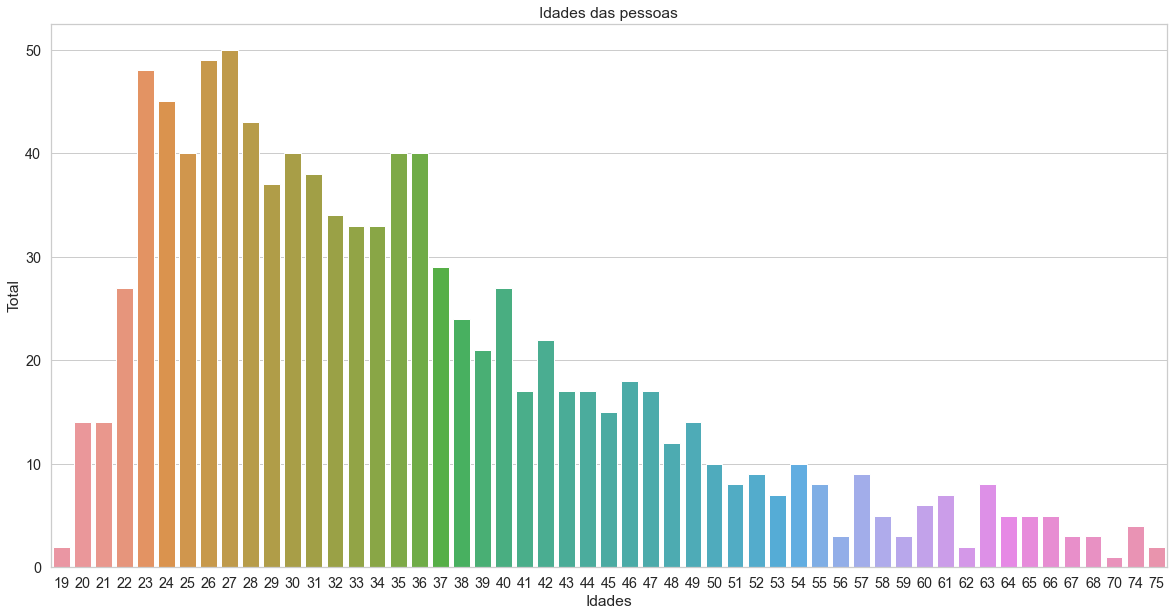

In [169]:
plt.figure(figsize=(20,10))

plt.title("Idades das pessoas")
sns.countplot(df["age"])
plt.xlabel("Idades")
plt.ylabel("Total")

Text(0.5, 0, 'Ocupação de cargos')

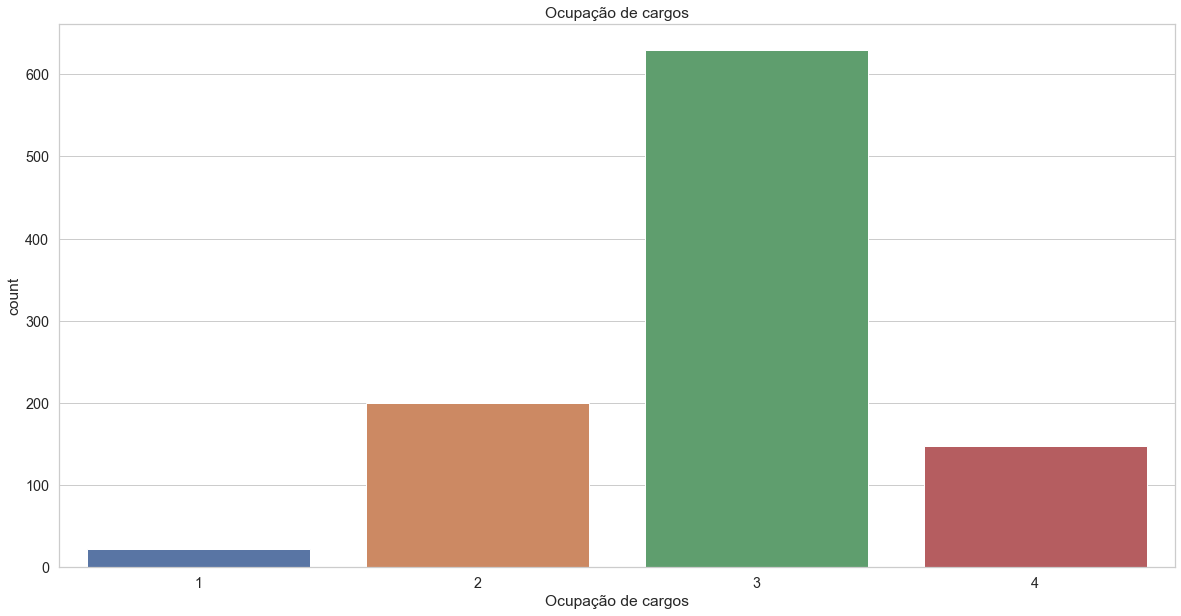

In [170]:
plt.figure(figsize=(20,10))

plt.title("Ocupação de cargos")
sns.countplot(df["occupation"])
plt.xlabel("Ocupação de cargos")

Text(0, 0.5, 'Total')

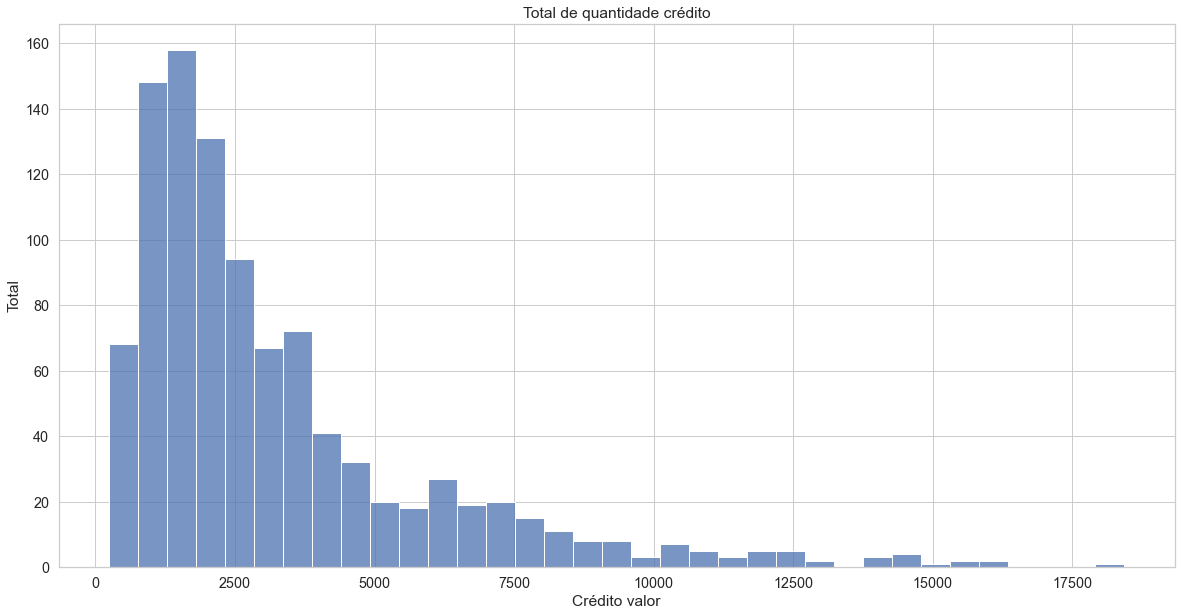

In [188]:
plt.figure(figsize=(20,10))
plt.title("Total de quantidade crédito")
sns.histplot(df["credit.amount"])
plt.xlabel("Crédito valor")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

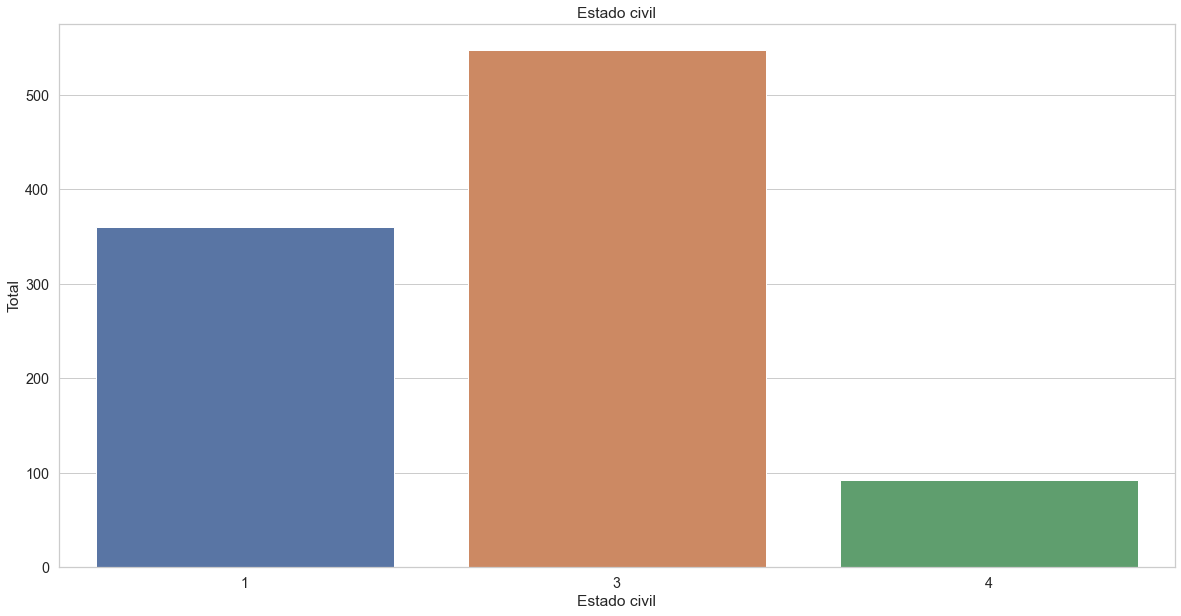

In [186]:
plt.figure(figsize=(20, 10))
sns.countplot(df["marital.status"])
plt.title("Estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

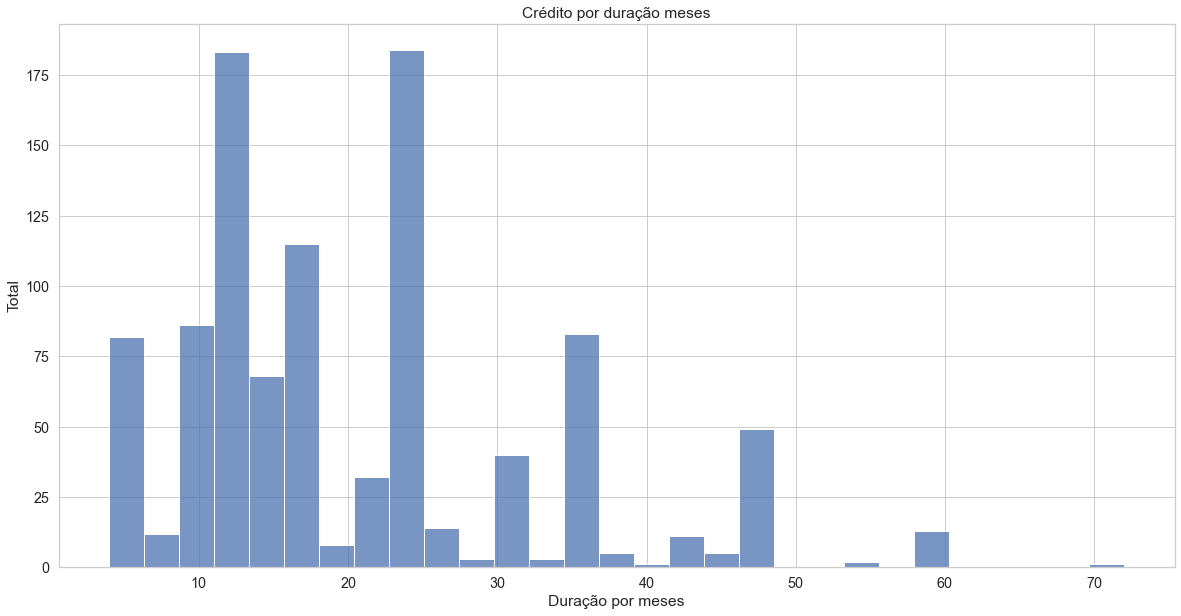

In [184]:
plt.figure(figsize=(20, 10))
sns.histplot(df["credit.duration.months"])
plt.title("Crédito por duração meses")
plt.xlabel("Duração por meses")
plt.ylabel("Total")

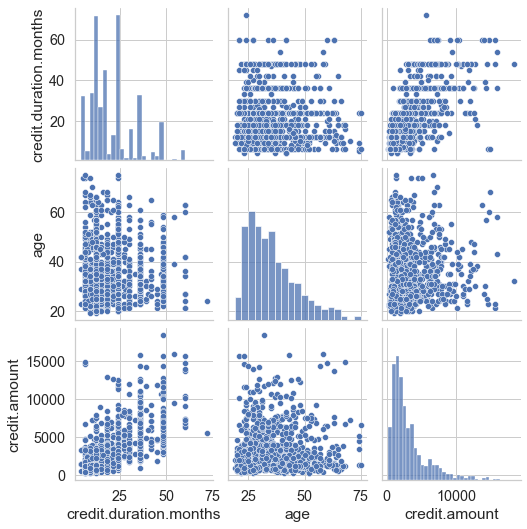

In [179]:
sns.pairplot(data_numeric)

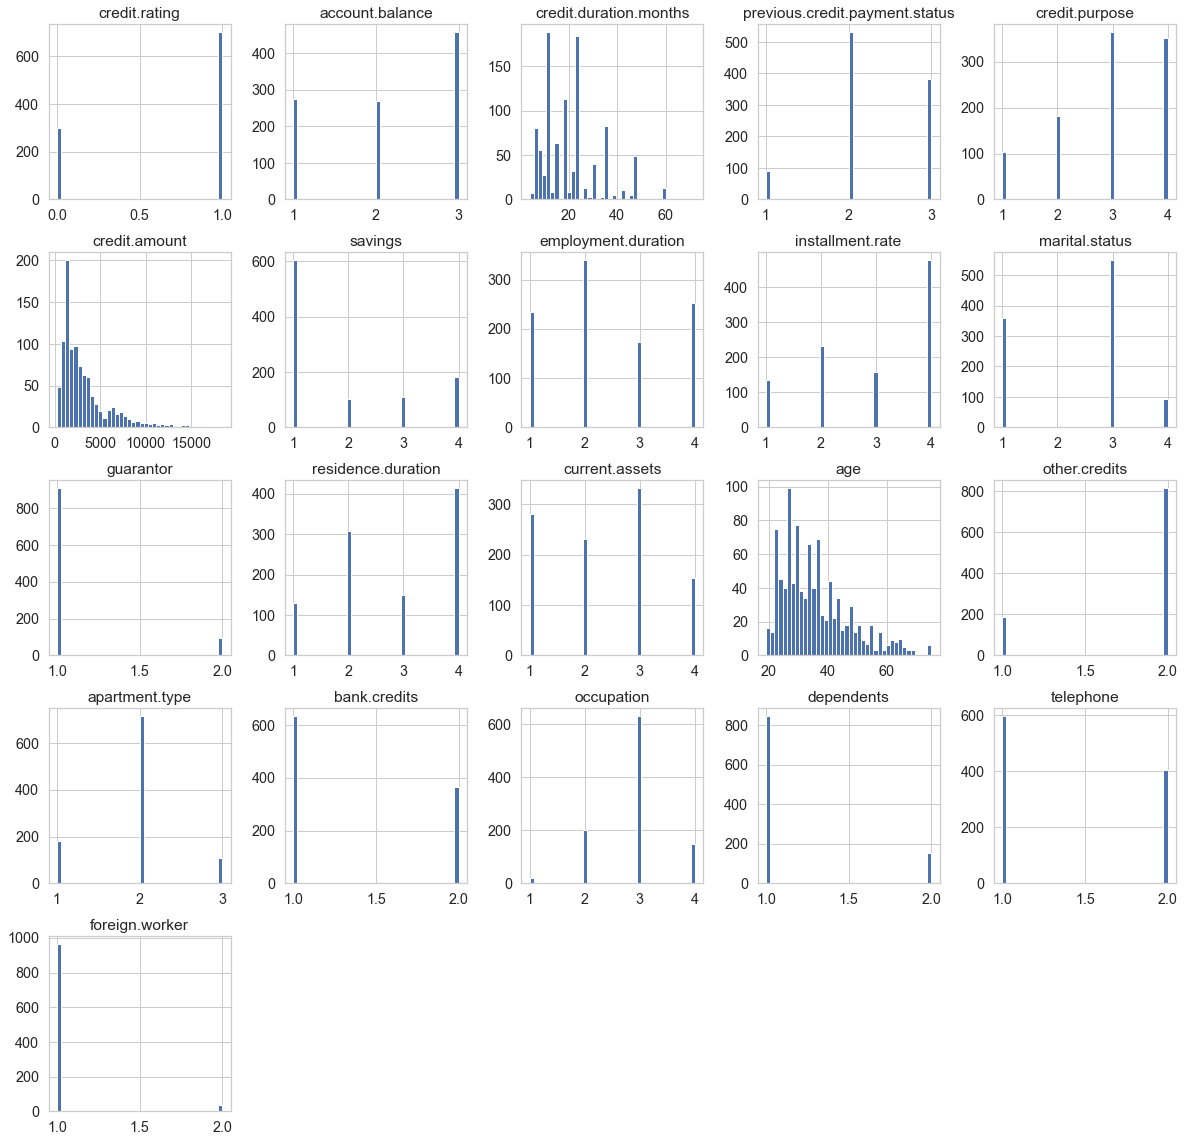

In [189]:
df.hist(bins = 40, figsize=(20.2, 20))
plt.show()

# Limpeza dos dados

In [29]:
df_duplicat = df.duplicated(keep='first')
df_duplicat

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [30]:
df.drop_duplicates(keep='first', inplace=True)
df

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [31]:
# Remoção de nulos

# Colunas que tem dados nulos ou não tem dados nulos
data_nulos = df.isnull().any()
data_nulos

credit.rating                     False
account.balance                   False
credit.duration.months            False
previous.credit.payment.status    False
credit.purpose                    False
credit.amount                     False
savings                           False
employment.duration               False
installment.rate                  False
marital.status                    False
guarantor                         False
residence.duration                False
current.assets                    False
age                               False
other.credits                     False
apartment.type                    False
bank.credits                      False
occupation                        False
dependents                        False
telephone                         False
foreign.worker                    False
dtype: bool

# Pré - processamento de dados

- O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

**Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações**

In [38]:
# Defenindo base treino e teste 

x = df.drop('credit.rating', axis=1)
y = df['credit.rating'].values

In [39]:
# Visualizando linha e coluna da váriavel x
x.shape

(1000, 20)

In [40]:
# Visualizando linha e coluna da váriavel y
y.shape

(1000,)

**Balanceamento de Classe - ROSE Random Over Sampling**

In [56]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

model_rose = RandomOverSampler(sampling_strategy='minority')
model_rose = RandomOverSampler(sampling_strategy=0.8)
x_rs, y_rs = model_rose.fit_resample(x, y)

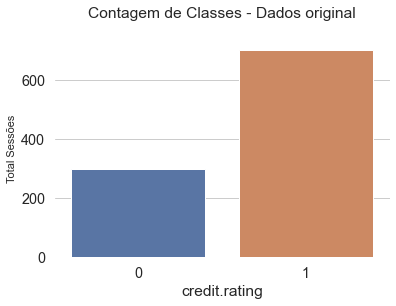

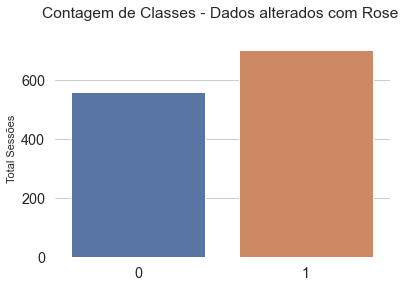

Shape dos dados originais x (1000, 20)

Shape dos dados originais y (1000,)

Shape dos dados reamostrados x (1260, 20)

Shape dos dados reamostrados y (1260,)


In [62]:
# Plot 
sns.countplot(df["credit.rating"])
plt.box(False)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes - Dados original\n')
plt.show()

# Plot 
sns.countplot(y_rs)
plt.box(False)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes - Dados alterados com Rose \n')
plt.show()

# Shape dos dados originais
x.shape

# Shape dos dados reamostrados 
x_rs.shape

# Shape dos dados reamostrados 
y_rs.shape

# Ajustando X e y
x1 = x_rs
y1 = y_rs

print("Shape dos dados originais x", x.shape)
print()
print("Shape dos dados originais y", y.shape)
print()
print("Shape dos dados reamostrados x", x_rs.shape)
print()
print("Shape dos dados reamostrados y", y_rs.shape)

# Treino e teste
- Treino e teste do modelo machine learning 80 para dados de treino 20 para dados de teste

**train_test_split: O train test split ele define o conjunto de dados de treinamento os dados em float deve estar entre 0.0 e 1 vai ser definirá o conjunto de dados teste**

- Test_size: E o tamanho do conjunto de teste para ser usando dados de teste 0.25 ou 25 por cento.

- Random_state: Devisão dos dados ele um objeto para controla a randomização durante a devisão dos dados

In [63]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

# Seed para modelo
seed = 30

# Size
size = 0.3

# Divisão em Dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=size, random_state=seed)

In [64]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(882, 20)

In [65]:
# Total de linhas dos dados de treino y
x_train.shape

(882, 20)

In [66]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(378, 20)

In [67]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(378,)

In [68]:
# Aplicando a normalização
from sklearn.preprocessing import MinMaxScaler

pre_scaler = MinMaxScaler()
pre_scaler_fit = pre_scaler.fit(x_train)
x_train_pre_scaler_transform = pre_scaler.transform(x_train)
x_test_pre_scaler_transform = pre_scaler.transform(x_test)

print("Normalização X_train")
x_train_pre_scaler_transform

Normalização X_train


array([[1.        , 0.35714286, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.35714286, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.14285714, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.35714286, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.14285714, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.125     , 1.        , ..., 0.        , 0.        ,
        0.        ]])

# Modelo machine learning

- Modelo 01 - Decision Tree Classifier

In [72]:
# Modelo - Decision tree classifier

# Importação da biblioteca
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(max_depth = 5) # Nome do algoritmo M.L
model_decision_tree_fit = model_decision_tree.fit(x_train, y_train) # Treinamento do modelo
model_decision_tree_scor = model_decision_tree.score(x_train, y_train) # Score do modelo dados treino x

print("Modelo - Decision Tree Classifier: %.2f" % (model_decision_tree_scor * 100)) # Score do modelo dados treino y

Modelo - Decision Tree Classifier: 77.55


In [73]:
# Previsão do modelo
model_decision_tree_pred = model_decision_tree.predict(x_test)
model_decision_tree_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

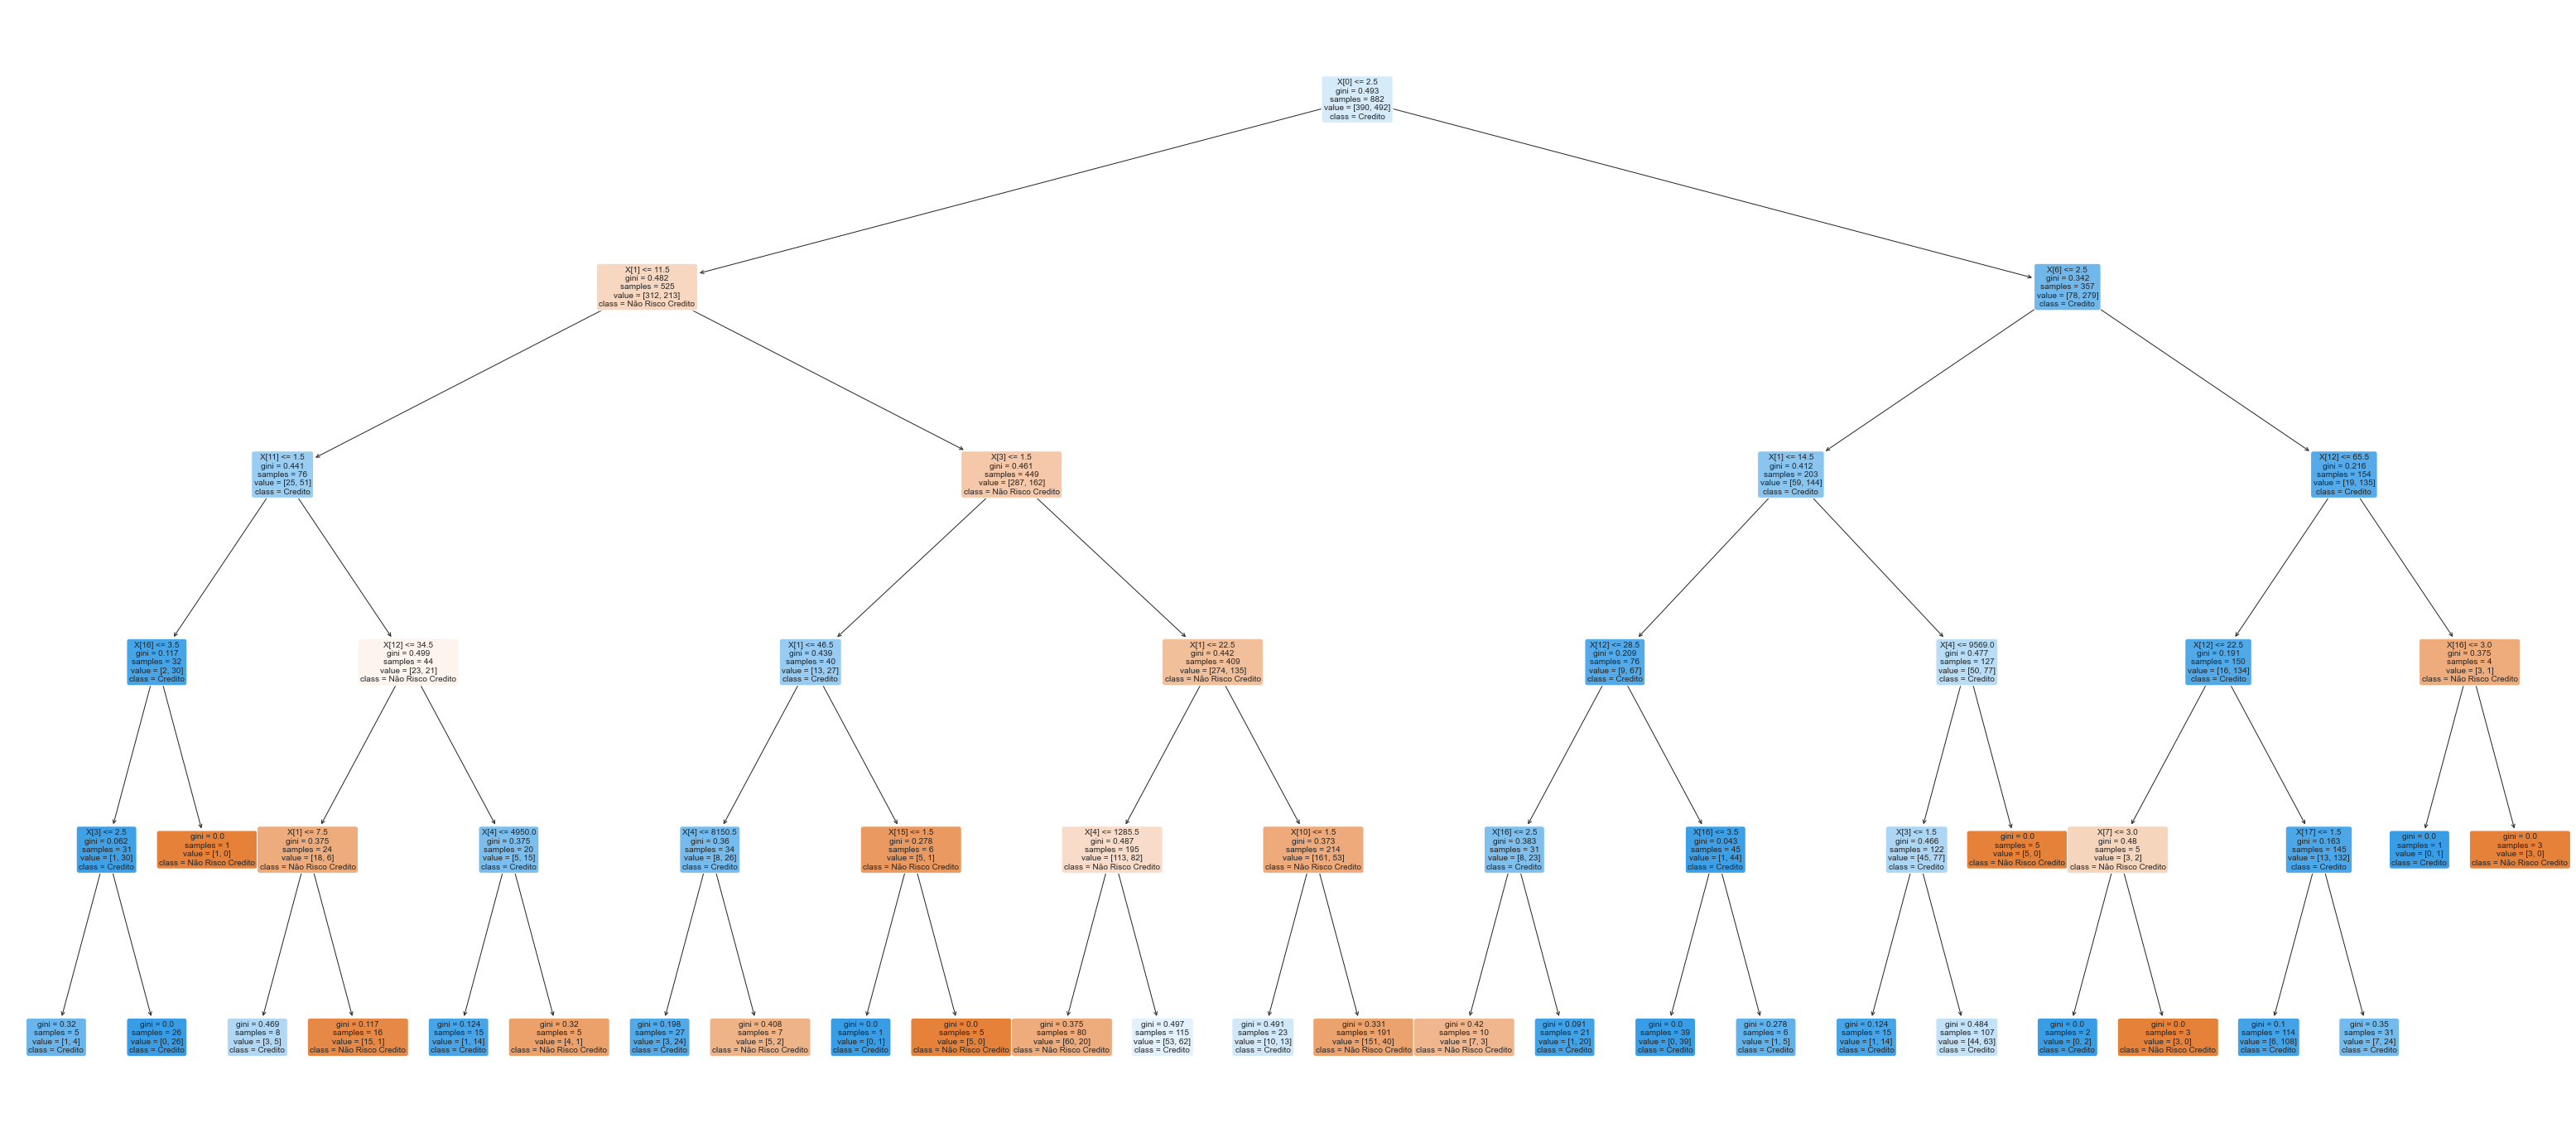

In [82]:
# Gráfico da árvore
from sklearn import tree

fig, ax = plt.subplots(figsize=(55.5, 25), facecolor = "w")
tree.plot_tree(model_decision_tree, 
               ax = ax, 
               fontsize = 10, 
               rounded = True, 
               filled = True, 
               class_names = ["Não Risco Credito", "Credito"])
plt.show()

# Accuracy

**Ela indica performance geral do modelo dentros todos as classificações quantas modelo classificou corretamente**

In [83]:
# Accuracy do modelo 
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, model_decision_tree_pred)
print("Acurácia - Decision Tree Classifier: %.2f" % (accuracy_dt * 100))

Acurácia - Decision Tree Classifier: 69.31


# Matrix confusion ou Matriz de Confusão
A matriz de confusão uma tabela que indica erros e acertos do modelo comparando com um resultado.

- Verdadeiros Positivos: A classificação da classe positivo.

- Falsos Negativos (Erro Tipo II): Erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;

- Falsos Positivos (Erro Tipo I): Erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo

- Verdadeiros Negativos: Classificação correta da classe Negativo.

In [85]:
!pip install mlxtend

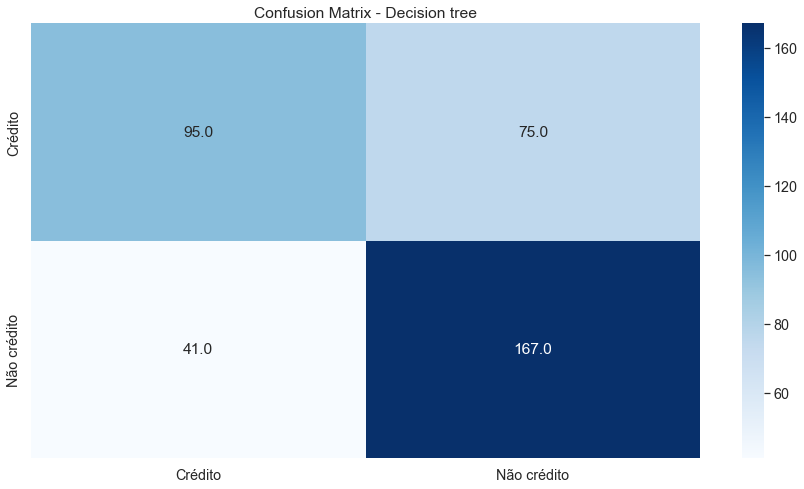

In [90]:
# Matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_decision_tree_pred)

# Plot matriz de confusão
plt.figure(figsize=(15, 8))

ax = plt.subplot()
sns.heatmap(matrix_confusion, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

# Curva roc
A curva roc ela exibir graficamente comparar a avaliar acurácia. As curvas roc integram três medidas precisão relacionadas a sensibilidade com os verdadeiro e positivo, especificidade com os verdadeiro negativo.

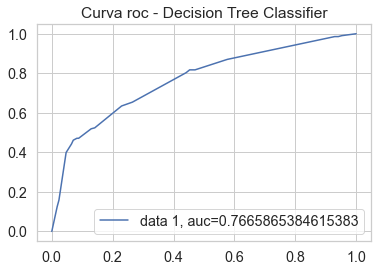

In [91]:
# Cruva roc do modelo

from sklearn import metrics

roc_g = model_decision_tree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification report

- O visualizador do relatório de classificação exibe as pontuações de precisão, recuperação, F1 e suporte para o modelo. Para facilitar a interpretação e a detecção de problemas, o relatório integra pontuações numéricas com um mapa de calor codificado por cores. Todos os mapas de calor estão na faixa para facilitar a comparação fácil de modelos de classificação em diferentes relatórios de classificação.

In [92]:
# Classification report

from sklearn.metrics import classification_report

classification = classification_report(y_test, model_decision_tree_pred)
print("Modelo - Decision Tree Classifier")
print("\n")
print(classification)

Modelo - Decision Tree Classifier


              precision    recall  f1-score   support

           0       0.70      0.56      0.62       170
           1       0.69      0.80      0.74       208

    accuracy                           0.69       378
   macro avg       0.69      0.68      0.68       378
weighted avg       0.69      0.69      0.69       378



In [93]:
# Métricas do modelos

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_decision_tree_pred)
Recall = recall_score(y_test, model_decision_tree_pred)
Accuracy = accuracy_score(y_test, model_decision_tree_pred)
F1_Score = f1_score(y_test, model_decision_tree_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.802885
3,F1_Score,0.742222
2,Accuracy,0.693122
0,precision,0.690083


# Modelo 02 -  KNN

In [94]:
%%time

# Importando biblioteca 
from sklearn.neighbors import KNeighborsClassifier

# Nome do algoritmo M.L
model_knn = KNeighborsClassifier(n_neighbors = 10)

# Treinamento do modelo
model_knn_fit = model_knn.fit(x_train, y_train)

# Score do modelo
model_knn_score = model_knn.score(x_train, y_train)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 66.78
Wall time: 59 ms


In [95]:
# Previsão do modelo
model_knn_pred = model_knn.predict(x_test)
model_knn_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [96]:
# Accuracy score
accuracy_knn = accuracy_score(y_test, model_knn_pred)
print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 56.08


In [97]:
# Confusion matrix

matrix_confusion_3 = confusion_matrix(y_test, model_knn_pred)
matrix_confusion_3

array([[ 98,  72],
       [ 94, 114]], dtype=int64)

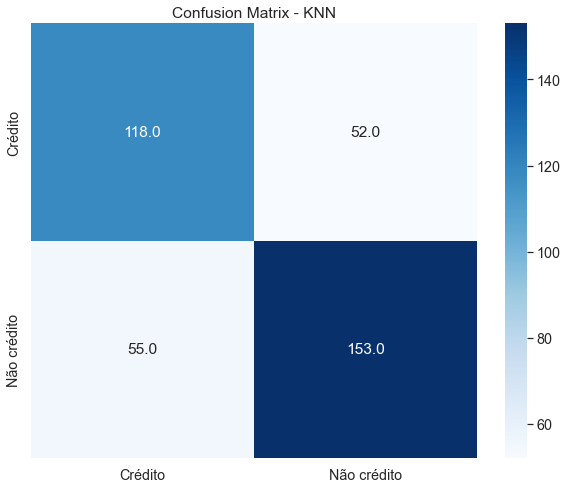

In [157]:
# Plot confusion matrix

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - KNN'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

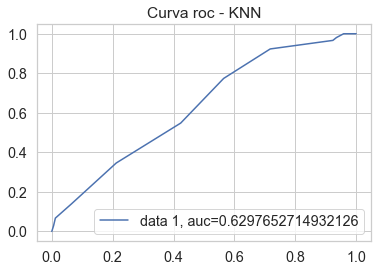

In [99]:
# Curva roc do modelo

roc_g = model_knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - KNN")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [100]:
# Classification report do modelo

classification = classification_report(y_test, model_knn_pred)
print("Modelo 02 - K-NN")
print()
print(classification)

Modelo 02 - K-NN

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       170
           1       0.61      0.55      0.58       208

    accuracy                           0.56       378
   macro avg       0.56      0.56      0.56       378
weighted avg       0.57      0.56      0.56       378



In [101]:
# Métricas do modelos

precision = precision_score(y_test, model_knn_pred)
Recall = recall_score(y_test, model_knn_pred)
Accuracy = accuracy_score(y_test, model_knn_pred)
F1_Score = f1_score(y_test, model_knn_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.612903
3,F1_Score,0.578680
2,Accuracy,0.560847
1,Recall,0.548077


# Modelo 03 - Naive bayes

In [102]:
# Time do modelo ML

# Importação da biblioteca
from sklearn.naive_bayes import GaussianNB 

model_naive_bayes = GaussianNB() # Nome do algoritmo M.L
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train) # Treinamento do modelo
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train) # Score do modelo dados treino x y

print("Modelo - Naive Bayes: %.2f" % (model_naive_bayes_score * 100)) # Score do modelo dados treino y

Modelo - Naive Bayes: 73.02


In [103]:
# Previsão do modelo - Naive bayes
model_naive_bayes_pred_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_pred_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [104]:
# Accuracy do modelo 

accuracy_nb = accuracy_score(y_test, model_naive_bayes_pred_predict)
print("Accuracy Naive bayes: %.2f" % (accuracy_nb * 100))

Accuracy Naive bayes: 71.69


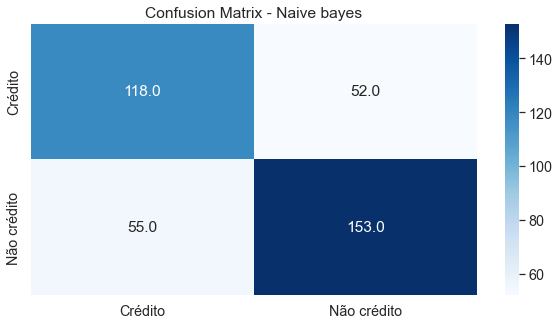

In [159]:
# Matriz de confusão
matrix_confusion_3 = confusion_matrix(y_test, model_naive_bayes_pred_predict)

# Plot confusion matrix
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

roc_auc 0.7911481900452488


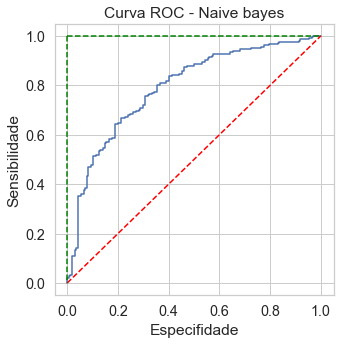

In [106]:
# Cruva roc do modelo
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Naive bayes')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [107]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_naive_bayes_pred_predict)
print("Modelo")
print()
print(classification)

Modelo

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       170
           1       0.75      0.74      0.74       208

    accuracy                           0.72       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.72      0.72      0.72       378



In [108]:
# Métricas do modelo 

precision = precision_score(y_test, model_naive_bayes_pred_predict)
Recall = recall_score(y_test, model_naive_bayes_pred_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_pred_predict)
F1_Score = f1_score(y_test, model_naive_bayes_pred_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.746341
3,F1_Score,0.740920
1,Recall,0.735577
2,Accuracy,0.716931


# Modelo 04 - Regressão logistica

In [109]:
%%time

# Importando biblioteca 
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_regression_logistic = LogisticRegression()

# Treinamento do modelo
model_regression_logistic_fit = model_regression_logistic.fit(x_train, y_train)

# Score do modelo
model_regression_logistic_score = model_regression_logistic.score(x_train, y_train)
print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 72.79
Wall time: 35 ms


In [110]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(x_test)
model_regression_logistic_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [111]:
# Accuracy score
accuracy_regression_logistic = accuracy_score(y_test, model_regression_logistic_pred)
print("Accuracy -  Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy -  Logistic regression: 71.69


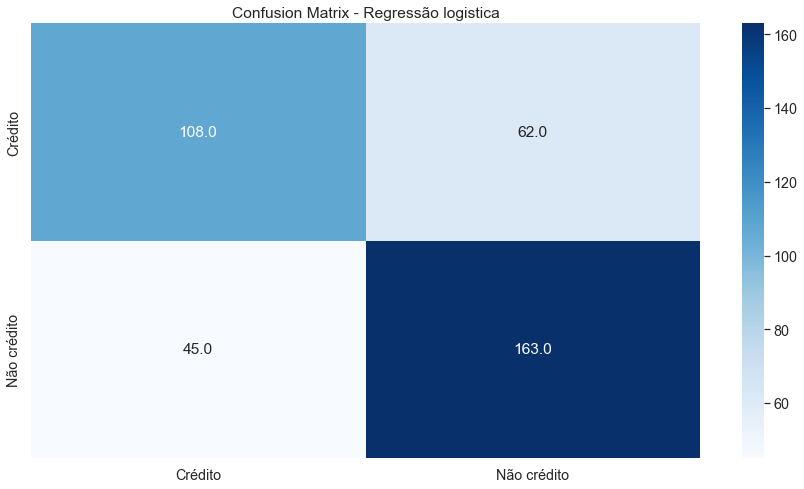

In [160]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(y_test, model_regression_logistic_pred)

# Plot Confusion matrix
plt.figure(figsize=(15, 8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Regressão logistica'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

roc_auc 0.7800622171945701


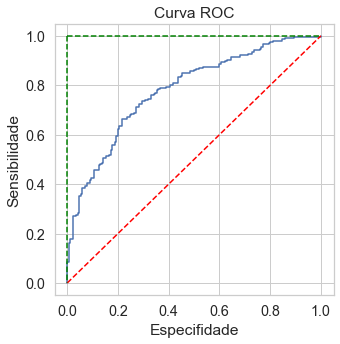

In [113]:
# Curva roc do modelo

roc = model_regression_logistic.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [114]:
# Classification report

classification = classification_report(y_test, model_regression_logistic_pred)
print("Modelo 04 - Regressão logistica")
print()
print(classification)

Modelo 04 - Regressão logistica

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       170
           1       0.72      0.78      0.75       208

    accuracy                           0.72       378
   macro avg       0.72      0.71      0.71       378
weighted avg       0.72      0.72      0.72       378



In [115]:
# Métricas do modelos

precision = precision_score(y_test, model_regression_logistic_pred)
Recall = recall_score(y_test, model_regression_logistic_pred)
Accuracy = accuracy_score(y_test, model_regression_logistic_pred)
F1_Score = f1_score(y_test, model_regression_logistic_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.783654
3,F1_Score,0.752887
0,precision,0.724444
2,Accuracy,0.716931


# Modelo 05 - XGBoost

In [117]:
!pip install xgboost

In [118]:
%%time

# Importando biblioteca 
from xgboost import XGBClassifier

# Nome do algoritmo M.L
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(x_train, y_train)

# Score do modelo
xgb_score = xgb.score(x_train, y_train)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

Modelo - XGBoost: 100.00
Wall time: 3.83 s


In [119]:
# Previsão do modelo - XGBoost
xgb_pred = xgb.predict(x_test)
xgb_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [120]:
# Accuracy score
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 82.80


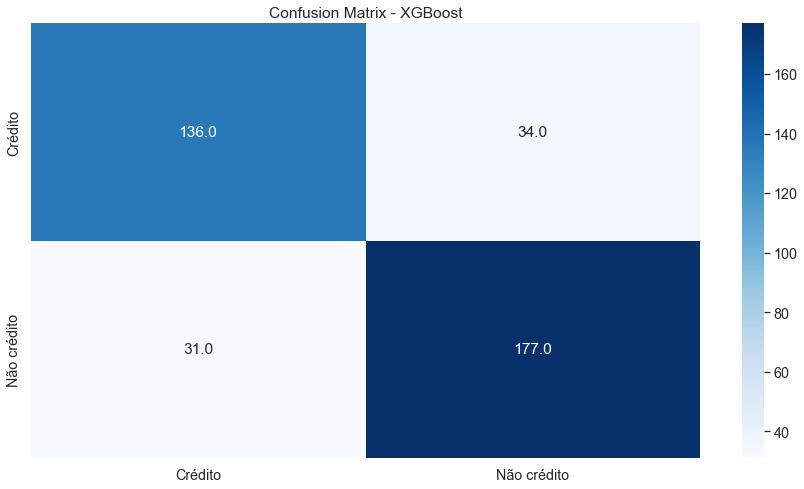

In [161]:
# Confusion matrix
matrix_confusion_5 = confusion_matrix(y_test, xgb_pred)


# Plot Confusion matrix
plt.figure(figsize=(15, 8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_5, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - XGBoost'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

roc_auc 0.8814479638009051


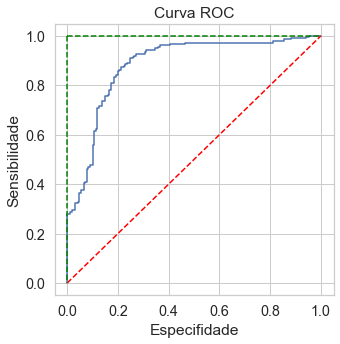

In [122]:
# Curva roc do modelo

roc = xgb.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [124]:
# Classification report

classification = classification_report(y_test, xgb_pred)
print("Modelo 05 - XGBoost")
print()
print(classification)

Modelo 05 - XGBoost

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       170
           1       0.84      0.85      0.84       208

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [125]:
# Métricas do modelo 

recision = precision_score(y_test, xgb_pred)
Recall = recall_score(y_test, xgb_pred)
Accuracy = accuracy_score(y_test, xgb_pred)
F1_Score = f1_score(y_test, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.850962
3,F1_Score,0.844869
2,Accuracy,0.828042
0,precision,0.724444


# Modelo 06 - Gradient Boosting

In [126]:
%%time

# Importando biblioteca
from sklearn.ensemble import GradientBoostingClassifier

# Nome do algoritmo M.L
model_gradient_boosting = GradientBoostingClassifier()

# Treinamento do modelo
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)

# Score do modelo
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Gradient Boosting: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Gradient Boosting: 88.66
Wall time: 183 ms


In [127]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [128]:
# Accuracy score
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)
print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 74.87


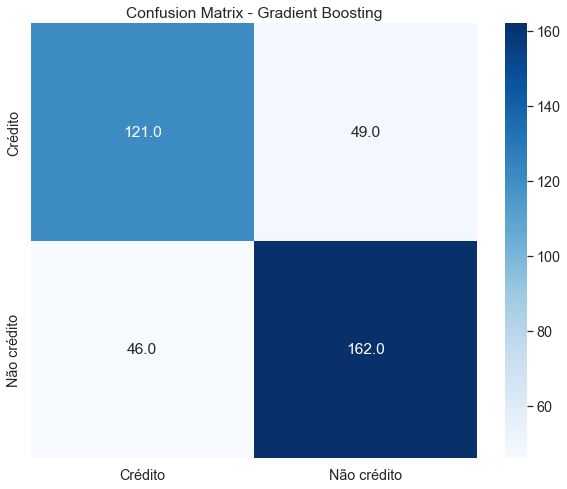

In [162]:
# Confusion matrix
matrix_confusion_6 = confusion_matrix(y_test, model_gradient_boosting_pred)

# Plot Confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_6, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Gradient Boosting'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

roc_auc 0.8292703619909503


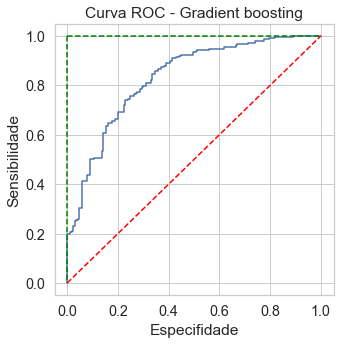

In [130]:
# Curva roc do modelo
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [131]:
# Classification report model
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo - 06 - Gradient boosting")
print("\n")
print(classification)

Modelo - 06 - Gradient boosting


              precision    recall  f1-score   support

           0       0.72      0.71      0.72       170
           1       0.77      0.78      0.77       208

    accuracy                           0.75       378
   macro avg       0.75      0.75      0.75       378
weighted avg       0.75      0.75      0.75       378



In [132]:
# Métricas do modelo

precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.778846
3,F1_Score,0.773270
0,precision,0.767773
2,Accuracy,0.748677


# Modelo 07 - Random Florest

In [134]:
# Importação da biblioteca 
from sklearn.ensemble import RandomForestClassifier

# Modelo random forest classifier
model_random_forest = RandomForestClassifier(max_depth = 5, random_state = 0)

# Modelo treinamento 
model_random_forest_fit = model_random_forest.fit(x_train, y_train)

# Modelo score do modelo
model_random_forest_score = model_random_forest.score(x_train, y_train)
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 81.07


In [135]:
# Previsão do modelo

model_random_forest_pred = model_random_forest.predict(x_test)
model_random_forest_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [136]:
# Accuracy do modelo
accuracy_random_forest = accuracy_score(y_test, model_random_forest_pred)

print("Acurácia - Random forest: %.2f" % (accuracy_random_forest * 100))

Acurácia - Random forest: 72.75


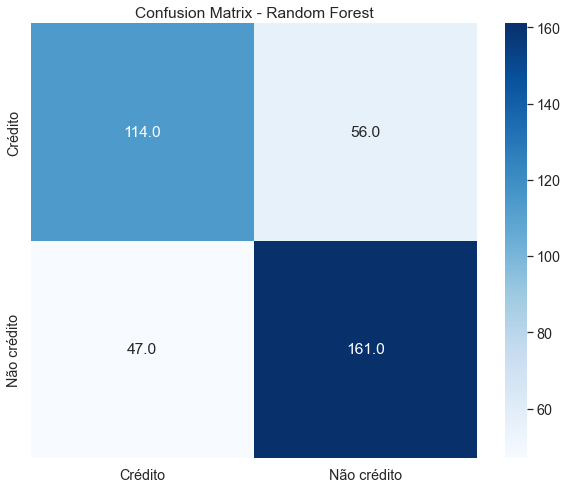

In [163]:
# confusion Matrix
matrix_confusion_7 = confusion_matrix(y_test, model_random_forest_pred)

# Plot Confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.heatmap(matrix_confusion_7, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Random Forest'); 
ax.xaxis.set_ticklabels(["Crédito", "Não crédito"]); ax.yaxis.set_ticklabels(["Crédito", "Não crédito"]);

roc_auc 0.8268382352941176


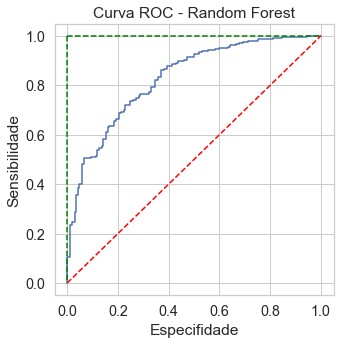

In [139]:
# Curva roc do modelo
roc = model_random_forest.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Random Forest')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [141]:
# Classificação report do modelo
classification = classification_report(y_test, model_random_forest_pred)

print("Modelo - 07 - Random Forest")
print()
print(classification)

Modelo - 07 - Random Forest

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       170
           1       0.74      0.77      0.76       208

    accuracy                           0.73       378
   macro avg       0.73      0.72      0.72       378
weighted avg       0.73      0.73      0.73       378



In [142]:
# Métricas do modelo
precision = precision_score(y_test, model_random_forest_pred)
Recall = recall_score(y_test, model_random_forest_pred)
Accuracy = accuracy_score(y_test, model_random_forest_pred)
F1_Score = f1_score(y_test, model_random_forest_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.774038
3,F1_Score,0.757647
0,precision,0.741935
2,Accuracy,0.727513


# Resultados - Modelos machine learning

In [166]:
# Recall Decision Tree
recall_Decision_Tree = recall_score(y_test, model_decision_tree_pred, average='macro')

# Recall Decision K-NN
recall_Decision_knn = recall_score(y_test, model_knn_pred, average='macro')

# Recall naive bayes
recall_Naive_Bayes_GaussianNB = recall_score(y_test, model_naive_bayes_pred_predict, average='macro')

# Recall regression logistic
recall_Regression_logistic = recall_score(y_test, model_regression_logistic_pred, average='macro')

# Recall xgbost
recall_xgbost = recall_score(y_test, xgb_pred, average='macro')

# Recall Gradient boosting
recall_gradient_boosting = recall_score(y_test, model_gradient_boosting_pred, average='macro')

# Recall Random_forest
recall_Random_forest = recall_score(y_test, model_random_forest_pred, average='macro')

# Resultados - Acurácia

modelos = pd.DataFrame({
    
    "Modelos" :["Regressão logistica", 
                "K-NN", 
                "Random Forest",
                "XGBoost", 
                "Gradient boosting",
                "Decision Tree",
                "Naive Bayes"],

    "Acurácia" :      [accuracy_nb, 
                      accuracy_random_forest, 
                      accuracy_dt,
                      accuracy_XGBoost,
                      accuracy_model_gradient_boosting,
                      accuracy_regression_logistic,
                      accuracy_knn]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Modelos,Acurácia
3,XGBoost,0.828042
4,Gradient boosting,0.748677
1,K-NN,0.727513
0,Regressão logistica,0.716931
5,Decision Tree,0.716931
2,Random Forest,0.693122
6,Naive Bayes,0.560847


In [167]:
# Resultados - Recall

modelos = pd.DataFrame({
    
    "Modelos" :["Regressão logistica", 
                "K-NN", 
                "Random Forest",
                "XGBoost", 
                "Gradient boosting",
                "Decision Tree",
                "Naive Bayes"],

    "Recall" :      [recall_Decision_Tree, 
                      recall_Decision_knn, 
                      recall_Naive_Bayes_GaussianNB,
                      recall_Regression_logistic,
                      recall_xgbost,
                      recall_gradient_boosting,
                      recall_Random_forest]})

modelos.sort_values(by = "Recall", ascending = False)

,Modelos,Recall
4,Gradient boosting,0.825481
5,Decision Tree,0.745305
6,Naive Bayes,0.722313
2,Random Forest,0.714847
3,XGBoost,0.709474
0,Regressão logistica,0.680854
1,K-NN,0.562274
